## **Ciencia de datos en el cuidado de la salud. Análisis estadístico básico**


Este proyecto se dedica a la descarga, pre-preparación y análisis estadístico de las pruebas ELISA y recopila información sobre IgG e IgM, vacunación contra la influenza, vacunación contra la tuberculosis y enfermedades previas, grupo sanguíneo que tienen los encuestados.


## Introducción

El principal problema a resolver en este proyecto es la descarga y análisis estadístico de un DataSet.

La dificultad básica del análisis estadístico de datos reales es que se preparan o presentan en una forma que no es conveniente para los métodos mecánicos de análisis estadístico. Por lo tanto, esta práctica  muestra métodos de pre-preparación automática de datos reales para tales casos, manipular y transformar de manera competente los grandes datos para obtener un informe estadístico conveniente tanto en forma tabular como en forma de gráficos.


## Materials and methods


En este proyecto, aprenderemos los métodos de análisis estadístico de los datos obtenidos a través de una encuesta de personas sobre la enfermedad de COVID-19. consta de tres etapas:
* Descarga de datos
* Preparación de datos
* Análisis estadístico
* Visualización de datos


Los datos estadísticos obtenidos durante una encuesta realizada por científicos del Departamento de Sistemas de Inteligencia Artificial de la Universidad Nacional Politécnica de Lviv se utilizarán en este laboratorio.
La investigación se probó en consecuencia con la subvención 305.2825-20 Stop COVID'19 de Central European Initiative (CEI)

## Importar bibliotecas/Definir funciones auxiliares


Libraries such as Pandas, MatplotLib and SeaBorn should be installed.


## Descargar datos de un archivo .xlsx


In [271]:
import openpyxl
import pandas as pd
from datetime import datetime

In [272]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1')

Ahora veamos nuestra DataSet.

In [273]:
df

Date time    Age          Gender                 Region  \
0    2020-09-20 11:23:15.000  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
1    2020-09-20 11:23:15.000  23-40  Female (Жінка)    Ukraine, Chernivtsi   
2    2020-09-20 11:23:15.000  23-40  Female (Жінка)  Ukraine, Lviv (Львів)   
3    2020-09-20 11:23:15.000  40-65  Male (Чоловік)    Ukraine, Chernivtsi   
4    2020-09-20 11:23:15.000  16-22  Male (Чоловік)  Ukraine, Lviv (Львів)   
...                      ...    ...             ...                    ...   
3303 2021-03-02 09:56:35.956  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
3304 2021-03-02 10:10:18.976  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
3305 2021-03-04 11:03:43.786  40-65  Male (Чоловік)  Ukraine, Lviv (Львів)   
3306 2021-03-04 11:04:30.416  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
3307 2021-04-05 03:18:16.644  16-22  Female (Жінка)  Ukraine, Lviv (Львів)   

     Do you smoke? Have you had Covid`19 this year?  \
0               No                  Maybe (можливо)   
1               No                              Yes   
2               No                  Maybe (можливо)   
3               No                               No   
4               No                              Yes   
...            ...                              ...   
3303            No                  Maybe (можливо)   
3304            No                  Maybe (можливо)   
3305            No                  Maybe (можливо)   
3306            No                  Maybe (можливо)   
3307           Yes                              Yes   

                       IgM level                           IgG level  \
0     <0.9 (negative/негативний)  0.9-1.1 (indefinable/невизначений)   
1     >1.1 (positive/позитивний)  0.9-1.1 (indefinable/невизначений)   
2     <0.9 (negative/негативний)          <0.9 (negative/негативний)   
3     <0.9 (negative/негативний)          <0.9 (negative/негативний)   
4     >1.1 (positive/позитивний)          <0.9 (negative/негативний)   
...                          ...                                 ...   
3303                         NaN                                 NaN   
3304                         NaN                                 NaN   
3305                         NaN                                 NaN   
3306                         NaN                                 NaN   
3307  <0.9 (negative/негативний)          >1.1 (positive/позитивний)   

      Blood group Do you vaccinated influenza?  \
0             2.0                          Yes   
1             2.0                           No   
2             2.0                           No   
3             2.0                           No   
4             1.0                           No   
...           ...                          ...   
3303          2.0                          Yes   
3304          2.0                          Yes   
3305          1.0                           No   
3306          2.0                           No   
3307          2.0                           No   

     Do you vaccinated tuberculosis? Have you had influenza this year?  \
0                                Yes                                No   
1                                Yes                                No   
2                                Yes                               Yes   
3                                Yes                                No   
4                                Yes                               Yes   
...                              ...                               ...   
3303                             Yes                   Maybe (можливо)   
3304                             Yes                   Maybe (можливо)   
3305                             Yes                   Maybe (можливо)   
3306                             Yes                   Maybe (можливо)   
3307                             Yes                                No   

     Have you had tuberculosis this year?   Maximum body temperatu

Podemos ver que el tamaño del DataSet es de 3308 filas y 14 columnas.


Primero, debe seleccionar la fecha y la hora de la primera columna como campo de índice. Esto le permitirá agrupar convenientemente los datos en función del momento de su recepción.
Dado que la fecha y la hora pueden venir en diferentes formatos, es conveniente escribir su propia función de analizador que transformará cualquier formato de fecha y hora en el formato de fecha y hora de Python.
En nuestro caso, dividimos cualquier celda de fecha/hora en dos partes (fecha y hora). Luego asignamos solo horas, minutos y segundos del tiempo. Luego los fusionamos nuevamente y los transformamos en fecha y hora usando **[strptime()]
También se debe establecer cómo el DataSet describe los datos que faltan porque puede afectar negativamente a las estadísticas.
Luego recargamos los datos del archivo.


In [274]:
def parse(x):
    y = x.split()
    t = y[1][:8]
    z=y[0] + " " + t
    d = datetime.strptime(z, '%Y-%m-%d %H:%M:%S')
    return d

In [275]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-statistical-analysis/COVID_19.xlsx',
    'Sheet1',
    na_values="NaN",
    parse_dates=['Date time'],
    index_col=0,
    date_parser=parse)

In [276]:
df

Age          Gender                 Region  \
Date time                                                           
2020-09-20 11:23:15  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2020-09-20 11:23:15  23-40  Female (Жінка)    Ukraine, Chernivtsi   
2020-09-20 11:23:15  23-40  Female (Жінка)  Ukraine, Lviv (Львів)   
2020-09-20 11:23:15  40-65  Male (Чоловік)    Ukraine, Chernivtsi   
2020-09-20 11:23:15  16-22  Male (Чоловік)  Ukraine, Lviv (Львів)   
...                    ...             ...                    ...   
2021-03-02 09:56:35  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2021-03-02 10:10:18  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2021-03-04 11:03:43  40-65  Male (Чоловік)  Ukraine, Lviv (Львів)   
2021-03-04 11:04:30  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2021-04-05 03:18:16  16-22  Female (Жінка)  Ukraine, Lviv (Львів)   

                    Do you smoke? Have you had Covid`19 this year?  \
Date time                                                            
2020-09-20 11:23:15            No                  Maybe (можливо)   
2020-09-20 11:23:15            No                              Yes   
2020-09-20 11:23:15            No                  Maybe (можливо)   
2020-09-20 11:23:15            No                               No   
2020-09-20 11:23:15            No                              Yes   
...                           ...                              ...   
2021-03-02 09:56:35            No                  Maybe (можливо)   
2021-03-02 10:10:18            No                  Maybe (можливо)   
2021-03-04 11:03:43            No                  Maybe (можливо)   
2021-03-04 11:04:30            No                  Maybe (можливо)   
2021-04-05 03:18:16           Yes                              Yes   

                                      IgM level  \
Date time                                         
2020-09-20 11:23:15  <0.9 (negative/негативний)   
2020-09-20 11:23:15  >1.1 (positive/позитивний)   
2020-09-20 11:23:15  <0.9 (negative/негативний)   
2020-09-20 11:23:15  <0.9 (negative/негативний)   
2020-09-20 11:23:15  >1.1 (positive/позитивний)   
...                                         ...   
2021-03-02 09:56:35                         NaN   
2021-03-02 10:10:18                         NaN   
2021-03-04 11:03:43                         NaN   
2021-03-04 11:04:30                         NaN   
2021-04-05 03:18:16  <0.9 (negative/негативний)   

                                              IgG level  Blood group  \
Date time                                                              
2020-09-20 11:23:15  0.9-1.1 (indefinable/невизначений)          2.0   
2020-09-20 11:23:15  0.9-1.1 (indefinable/невизначений)          2.0   
2020-09-20 11:23:15          <0.9 (negative/негативний)          2.0   
2020-09-20 11:23:15          <0.9 (negative/негативний)          2.0   
2020-09-20 11:23:15          <0.9 (negative/негативний)          1.0   
...                                                 ...          ...   
2021-03-02 09:56:35                                 NaN          2.0   
2021-03-02 10:10:18                                 NaN          2.0   
2021-03-04 11:03:43                                 NaN          1.0   
2021-03-04 11:04:30                                 NaN          2.0   
2021-04-05 03:18:16          >1.1 (positive/позитивний)          2.0   

                    Do you vaccinated influenza?  \
Date time                                          
2020-09-20 11:23:15                          Yes   
2020-09-20 11:23:15                           No   
2020-09-20 11:23:15                           No   
2020-09-20 11:23:15                           No   
2020-09-20 11:23:15                           No   
...                                          ...   
2021-03-02 09:56:35                          Yes   
2021-03-02 10:10:18                          Yes   
2021-03-04 11:03:43                           No   
2021-03-04 11:04:30                      

## Data preparation


Algunos encuestados no indicaron su género. Esto imposibilitará un mayor análisis de dichos datos.
Eliminar filas que no especifican género usando **[dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**:


In [277]:
df = df.dropna(subset=['Gender'])

Algunos datos pueden almacenarse en formatos que Python malinterpreta. Por lo tanto, puede utilizar **[mapa()] método para reemplazar los valores de celda. Por ejemplo, puede cambiar el valor Sí/No a Verdadero/Falso de la siguiente manera:


In [278]:
d = {'No' : False, 'Yes' : True}
c = 'Do you vaccinated influenza?'
df.loc[:, c] = df[c].map(d)

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\2131609141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, c] = df[c].map(d)


In [279]:
df

Age          Gender                 Region  \
Date time                                                           
2020-09-20 11:23:15  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2020-09-20 11:23:15  23-40  Female (Жінка)    Ukraine, Chernivtsi   
2020-09-20 11:23:15  23-40  Female (Жінка)  Ukraine, Lviv (Львів)   
2020-09-20 11:23:15  40-65  Male (Чоловік)    Ukraine, Chernivtsi   
2020-09-20 11:23:15  16-22  Male (Чоловік)  Ukraine, Lviv (Львів)   
...                    ...             ...                    ...   
2021-03-02 09:56:35  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2021-03-02 10:10:18  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2021-03-04 11:03:43  40-65  Male (Чоловік)  Ukraine, Lviv (Львів)   
2021-03-04 11:04:30  40-65  Female (Жінка)  Ukraine, Lviv (Львів)   
2021-04-05 03:18:16  16-22  Female (Жінка)  Ukraine, Lviv (Львів)   

                    Do you smoke? Have you had Covid`19 this year?  \
Date time                                                            
2020-09-20 11:23:15            No                  Maybe (можливо)   
2020-09-20 11:23:15            No                              Yes   
2020-09-20 11:23:15            No                  Maybe (можливо)   
2020-09-20 11:23:15            No                               No   
2020-09-20 11:23:15            No                              Yes   
...                           ...                              ...   
2021-03-02 09:56:35            No                  Maybe (можливо)   
2021-03-02 10:10:18            No                  Maybe (можливо)   
2021-03-04 11:03:43            No                  Maybe (можливо)   
2021-03-04 11:04:30            No                  Maybe (можливо)   
2021-04-05 03:18:16           Yes                              Yes   

                                      IgM level  \
Date time                                         
2020-09-20 11:23:15  <0.9 (negative/негативний)   
2020-09-20 11:23:15  >1.1 (positive/позитивний)   
2020-09-20 11:23:15  <0.9 (negative/негативний)   
2020-09-20 11:23:15  <0.9 (negative/негативний)   
2020-09-20 11:23:15  >1.1 (positive/позитивний)   
...                                         ...   
2021-03-02 09:56:35                         NaN   
2021-03-02 10:10:18                         NaN   
2021-03-04 11:03:43                         NaN   
2021-03-04 11:04:30                         NaN   
2021-04-05 03:18:16  <0.9 (negative/негативний)   

                                              IgG level  Blood group  \
Date time                                                              
2020-09-20 11:23:15  0.9-1.1 (indefinable/невизначений)          2.0   
2020-09-20 11:23:15  0.9-1.1 (indefinable/невизначений)          2.0   
2020-09-20 11:23:15          <0.9 (negative/негативний)          2.0   
2020-09-20 11:23:15          <0.9 (negative/негативний)          2.0   
2020-09-20 11:23:15          <0.9 (negative/негативний)          1.0   
...                                                 ...          ...   
2021-03-02 09:56:35                                 NaN          2.0   
2021-03-02 10:10:18                                 NaN          2.0   
2021-03-04 11:03:43                                 NaN          1.0   
2021-03-04 11:04:30                                 NaN          2.0   
2021-04-05 03:18:16          >1.1 (positive/позитивний)          2.0   

                    Do you vaccinated influenza?  \
Date time                                          
2020-09-20 11:23:15                         True   
2020-09-20 11:23:15                        False   
2020-09-20 11:23:15                        False   
2020-09-20 11:23:15                        False   
2020-09-20 11:23:15                        False   
...                                          ...   
2021-03-02 09:56:35                         True   
2021-03-02 10:10:18                         True   
2021-03-04 11:03:43                        False   
2021-03-04 11:04:30                      

Para un análisis más profundo es necesario estudiar las características generales de los campos usando **[info()]


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3296 non-null   object 
 1   Gender                                 3297 non-null   object 
 2   Region                                 3279 non-null   object 
 3   Do you smoke?                          3267 non-null   object 
 4   Have you had Covid`19 this year?       3296 non-null   object 
 5   IgM level                              3221 non-null   object 
 6   IgG level                              3237 non-null   object 
 7   Blood group                            3243 non-null   float64
 8   Do you vaccinated influenza?           3190 non-null   object 
 9   Do you vaccinated tuberculosis?        3294 non-null   object 
 10  Have you had influenza this year?   

Podemos ver que todos los datos de todas las columnas tienen un tipo de objeto no nulo (excepto el último). Ese es un tipo indefinido de datos.
Por lo tanto, es necesario transformar los datos y cambiar su tipo.


Como puede verse en la tabla, el campo Edad debe estar categorizado. Para esto podemos usar **[astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=astype#pandas.DataFrame.astype)**:


In [281]:
c = 'Age'
df.loc[:, c] = df[c].astype('category')

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\4247784575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, c] = df[c].astype('category')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\4247784575.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, c] = df[c].astype('category')


In [282]:
df['Age']

Date time
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    23-40
2020-09-20 11:23:15    40-65
2020-09-20 11:23:15    16-22
                       ...  
2021-03-02 09:56:35    40-65
2021-03-02 10:10:18    40-65
2021-03-04 11:03:43    40-65
2021-03-04 11:04:30    40-65
2021-04-05 03:18:16    16-22
Name: Age, Length: 3297, dtype: category
Categories (5, object): ['0-15', '16-22', '23-40', '40-65', '>65']

We can see that this column has now become categorical and has 5 different categories.


Todos los demás campos, excepto el último, contienen valores cirílicos, por lo que deben reemplazarse y también convertirse en categóricos. Para ello, utilice **[lambda] función para cada valor de celda en las columnas correspondientes. La idea principal en este caso es encontrar la posición del paréntesis abierto '( ' en la oración y devolver el fragmento de texto anterior. Si no hay paréntesis en el texto, déjelo sin cambios.


In [283]:
for c in df.columns[1:-1]:
    df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else  str(x)[:str(x).find('(')]).astype('category')

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\3531558069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else  str(x)[:str(x).find('(')]).astype('category')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\3531558069.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, c] = df[c].apply(lambda x : str(x) if str(x).find('(') == -1 else  str(x)[:str(x).find('(')]).astype('category')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\3531558069.p

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2020-09-20 11:23:15 to 2021-04-05 03:18:16
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Age                                    3296 non-null   category
 1   Gender                                 3297 non-null   category
 2   Region                                 3297 non-null   category
 3   Do you smoke?                          3297 non-null   category
 4   Have you had Covid`19 this year?       3297 non-null   category
 5   IgM level                              3297 non-null   category
 6   IgG level                              3297 non-null   category
 7   Blood group                            3297 non-null   category
 8   Do you vaccinated influenza?           3297 non-null   category
 9   Do you vaccinated tuberculosis?        3297 non-null   category
 10  Have you had influenza t

Las estadísticas de resumen se pueden ver con el siguiente comando **[describe()]


In [285]:
df.describe()

Maximum body temperature
count               1529.000000
mean                  37.710203
std                    0.634367
min                   36.600000
25%                   37.200000
50%                   37.700000
75%                   38.300000
max                   38.800000

In [286]:
df.describe(include=['category'])

Age   Gender          Region Do you smoke?  \
count    3296     3297            3297          3297   
unique      5        2               8             3   
top     23-40  Female   Ukraine, Lviv             No   
freq     1174     1818            3071          2498   

       Have you had Covid`19 this year? IgM level IgG level Blood group  \
count                              3297      3297      3297        3297   
unique                                5         4         5           5   
top                                  No     <0.9      <0.9          2.0   
freq                               1768      2651      2587        1381   

       Do you vaccinated influenza? Do you vaccinated tuberculosis?  \
count                          3297                            3297   
unique                            3                               5   
top                           False                             Yes   
freq                           2651                            2579   

       Have you had influenza this year? Have you had tuberculosis this year?   
count                               3297                                  3297  
unique                                 5                                     4  
top                                   No                                    No  
freq                                2347                                  3282

## Análisis estadístico


Como puede ver, la información estadística consiste en el número de valores únicos, el valor de la categoría más popular y el número de sus valores.
La información detallada para una columna específica se puede obtener de la siguiente manera (**[value_counts()]):


In [287]:
df['Age'].value_counts()

23-40    1174
40-65    1063
16-22     823
>65       193
0-15       43
Name: Age, dtype: int64

También puede obtener información en forma normalizada.


In [288]:
df['Age'].value_counts(normalize=True)

23-40    0.356189
40-65    0.322512
16-22    0.249697
>65      0.058556
0-15     0.013046
Name: Age, dtype: float64

### Clasificación


Puede ordenar los datos por una o un grupo de columnas, puede especificar la dirección de ordenación o crear sus propias reglas de ordenación (por ejemplo, para campos de categoría) usando **[sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=sort_values#pandas.DataFrame.sort_values)**


In [289]:
df.sort_values(by='Age', 
        ascending=True)

Age   Gender          Region Do you smoke?  \
Date time                                                          
2020-12-30 02:10:07  0-15    Male   Ukraine, Lviv             No   
2020-12-17 19:19:43  0-15  Female   Ukraine, Lviv             No   
2020-12-17 22:59:41  0-15    Male   Ukraine, Lviv             No   
2020-12-17 22:59:41  0-15    Male   Ukraine, Lviv             No   
2020-10-09 19:35:56  0-15    Male   Ukraine, Lviv             No   
...                   ...      ...             ...           ...   
2020-12-18 01:44:32   >65  Female   Ukraine, Lviv            Yes   
2020-12-18 01:44:32   >65  Female   Ukraine, Lviv            Yes   
2020-09-22 17:35:09   >65  Female   Ukraine, Lviv             No   
2020-10-12 14:58:30   >65    Male   Ukraine, Lviv             No   
2021-01-14 09:50:55   NaN  Female   Ukraine, Lviv             No   

                    Have you had Covid`19 this year? IgM level IgG level  \
Date time                                                                  
2020-12-30 02:10:07                               No     <0.9      <0.9    
2020-12-17 19:19:43                               No     <0.9      <0.9    
2020-12-17 22:59:41                               No     <0.9      <0.9    
2020-12-17 22:59:41                               No     <0.9      <0.9    
2020-10-09 19:35:56                               No     <0.9      <0.9    
...                                              ...       ...       ...   
2020-12-18 01:44:32                               No     <0.9      <0.9    
2020-12-18 01:44:32                               No     <0.9      <0.9    
2020-09-22 17:35:09                               No     <0.9      <0.9    
2020-10-12 14:58:30                              Yes     >1.1   0.9-1.1    
2021-01-14 09:50:55                              Yes     >1.1      >1.1    

                    Blood group Do you vaccinated influenza?  \
Date time                                                      
2020-12-30 02:10:07         3.0                        False   
2020-12-17 19:19:43         2.0                        False   
2020-12-17 22:59:41         2.0                        False   
2020-12-17 22:59:41         2.0                        False   
2020-10-09 19:35:56         4.0                        False   
...                         ...                          ...   
2020-12-18 01:44:32         4.0                        False   
2020-12-18 01:44:32         4.0                        False   
2020-09-22 17:35:09         1.0                        False   
2020-10-12 14:58:30         2.0                        False   
2021-01-14 09:50:55         2.0                        False   

                    Do you vaccinated tuberculosis?  \
Date time                                             
2020-12-30 02:10:07                              No   
2020-12-17 19:19:43                          Maybe    
2020-12-17 22:59:41                             Yes   
2020-12-17 22:59:41                             Yes   
2020-10-09 19:35:56                              No   
...                                             ...   
2020-12-18 01:44:32                             Yes   
2020-12-18 01:44:32                             Yes   
2020-09-22 17:35:09                             Yes   
2020-10-12 14:58:30                             Yes   
2021-01-14 09:50:55                             Yes   

                    Have you had influenza this year?  \
Date time                                               
2020-12-30 02:10:07                               Yes   
2020-12-17 19:19:43                            Maybe    
2020-12-17 22:59:41                               Yes   
2020-12-17 22:59:41                               Yes   
2020-10-09 19:35:56                               Yes   
...                                               ...   
2020-12-18 01:44:32                               Yes   
2020-12-18 01:44:32                               Yes   
2020-09-22 17:35:09          

Debe especificar la lista de campos y la dirección del orden en los parámetros **'by'** y **'ascending'**. Entonces, para ordenar por los campos 'Edad' en orden ascendente y 'Género' en orden descendente, necesita:


In [290]:
df.sort_values(by=['Age', 'Gender'], ascending=[True, False]).head()

Age Gender          Region Do you smoke?  \
Date time                                                        
2020-09-20 11:26:09  0-15  Male   Ukraine, Lviv             No   
2020-09-26 11:19:25  0-15  Male   Ukraine, Lviv             No   
2020-09-26 11:42:15  0-15  Male   Ukraine, Lviv             No   
2020-10-09 19:35:56  0-15  Male   Ukraine, Lviv             No   
2020-11-24 10:55:41  0-15  Male   Ukraine, Lviv             No   

                    Have you had Covid`19 this year? IgM level IgG level  \
Date time                                                                  
2020-09-20 11:26:09                               No     <0.9      <0.9    
2020-09-26 11:19:25                               No     <0.9      <0.9    
2020-09-26 11:42:15                           Maybe      <0.9   0.9-1.1    
2020-10-09 19:35:56                               No     <0.9      <0.9    
2020-11-24 10:55:41                               No     <0.9   0.9-1.1    

                    Blood group Do you vaccinated influenza?  \
Date time                                                      
2020-09-20 11:26:09         2.0                        False   
2020-09-26 11:19:25         4.0                        False   
2020-09-26 11:42:15         1.0                        False   
2020-10-09 19:35:56         4.0                        False   
2020-11-24 10:55:41         1.0                        False   

                    Do you vaccinated tuberculosis?  \
Date time                                             
2020-09-20 11:26:09                             Yes   
2020-09-26 11:19:25                              No   
2020-09-26 11:42:15                             Yes   
2020-10-09 19:35:56                              No   
2020-11-24 10:55:41                             Yes   

                    Have you had influenza this year?  \
Date time                                               
2020-09-20 11:26:09                                No   
2020-09-26 11:19:25                               Yes   
2020-09-26 11:42:15                            Maybe    
2020-10-09 19:35:56                               Yes   
2020-11-24 10:55:41                                No   

                    Have you had tuberculosis this year?   \
Date time                                                   
2020-09-20 11:26:09                                    No   
2020-09-26 11:19:25                                    No   
2020-09-26 11:42:15                                    No   
2020-10-09 19:35:56                                    No   
2020-11-24 10:55:41                                    No   

                     Maximum body temperature  
Date time                                      
2020-09-20 11:26:09                       NaN  
2020-09-26 11:19:25                       NaN  
2020-09-26 11:42:15                      38.7  
2020-10-09 19:35:56                       NaN  
2020-11-24 10:55:41                       NaN

### Data transformation


Para obtener información sobre un campo de categoría específico, puede utilizar:


In [291]:
df['Gender'].value_counts()

Female     1818
Male       1479
Name: Gender, dtype: int64

La lista de valores únicos se puede obtener de la siguiente manera:


In [292]:
df['Gender'].value_counts().keys()

CategoricalIndex(['Female ', 'Male '], categories=['Female ', 'Male '], ordered=False, dtype='category')

El valor promedio de temperatura para mujeres solo se puede obtener como (**[mean()](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=statistical)**):


In [293]:
df[df['Gender'] == 'Female ']['Maximum body temperature'].mean()

37.706805293005665

La temperatura máxima de los hombres que fuman y tienen COVID-19 es:


In [294]:
df[(df['Gender'] == 'Male ') & 
   (df['Do you smoke?'] == 'Yes') & 
   (df['Have you had Covid`19 this year?'] == 'Yes')]['Maximum body temperature'].max()

38.8

De lo contrario, puede obtener estadísticas completas por clase por separado agrupando los datos.


In [295]:
df.groupby(['Gender'])['Maximum body temperature'].describe()

count       mean       std   min   25%   50%   75%   max
Gender                                                            
Female   1058.0  37.706805  0.625076  36.6  37.2  37.7  38.2  38.8
Male      471.0  37.717834  0.655371  36.6  37.1  37.7  38.3  38.8

### Pivot tables


Supongamos que necesitamos contar cuántos hombres y mujeres hay de cada grupo de edad. Para hacer esto, use el **[crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=crosstab#pandas.crosstab)** function:


In [296]:
pd.crosstab(df['Age'], df['Gender'])

Gender  Female   Male 
Age                   
0-15         15     28
16-22       266    557
23-40       645    529
40-65       795    268
>65          96     97

La tabla muestra que la mayoría de las personas entrevistadas tienen entre 23 y 65 años.


Para obtener información resumida, por ejemplo, sobre la temperatura corporal, para hombres y mujeres de cada grupo de edad, es necesario utilizar una tabla dinámica **[pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=pivot_table#pandas.DataFrame.pivot_table)**


In [297]:
pd.pivot_table(df, values= 'Maximum body temperature', index= ['Age'], columns=['Gender'], aggfunc='mean', margins=True)

Gender    Female       Male         All
Age                                    
0-15    38.500000  37.437500  37.555556
16-22   37.731579  37.790196  37.746305
23-40   37.759053  37.754680  37.757473
40-65   37.679435  37.690780  37.681947
>65     37.502041  37.642647  37.583761
All     37.706528  37.717834  37.710013

Esta tabla muestra la temperatura promedio para mujeres y hombres en términos de grupos de edad.


## Visualize Data


In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualice el número de hombres y mujeres encuestados en términos de grupos de edad utilizando **[countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**:


<AxesSubplot: xlabel='Age', ylabel='count'>

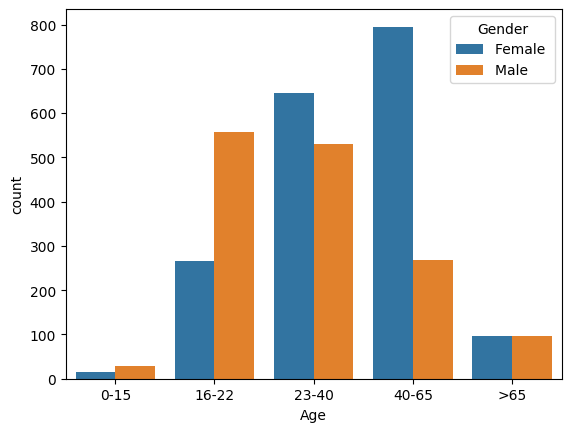

In [299]:
sns.countplot(x='Age', hue='Gender', data=df)

Analicemos la dinámica de las encuestas durante todo el tiempo de investigación. Para hacer esto, debe agrupar los datos por día usando el **[resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=resample#pandas.DataFrame.resample)** and **[plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=plot#pandas.DataFrame.plot)** methods.


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\819689582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample(str('1D')).sum().plot()


<AxesSubplot: xlabel='Date time'>

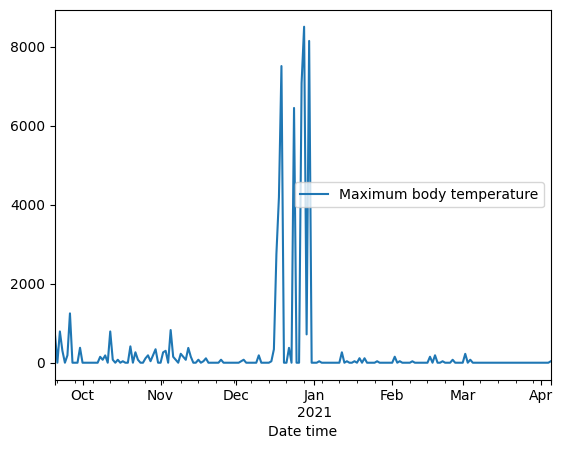

In [300]:
df.resample(str('1D')).sum().plot()

Algunos de los pacientes encuestados estaban seguros de tener COVID-19 y otros no. Tracemos la distribución de temperatura (**[distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**) de ambos grupos en una figura que contiene dos gráficos (**[subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**)


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\234759048.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_t['Maximum body temperature'], ax=axes[0])
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_1564\234759048.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_t['Maximum body tempera

<AxesSubplot: xlabel='Maximum body temperature', ylabel='Density'>

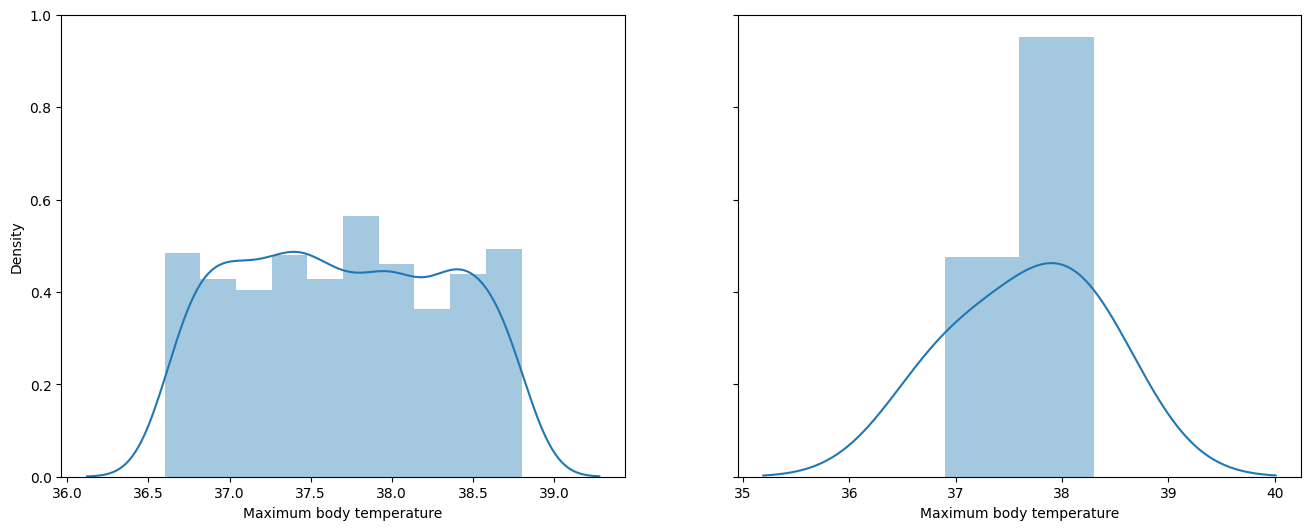

In [301]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

df_t = df[df['Have you had Covid`19 this year?'] == 'Yes'].dropna(subset=['Maximum body temperature'])
sns.distplot(df_t['Maximum body temperature'], ax=axes[0])
df_t = df[df['Have you had Covid`19 this year?'] == 'Maybe'].dropna(subset=['Maximum body temperature'])
sns.distplot(df_t['Maximum body temperature'], ax=axes[1])

Podemos concluir de los gráficos que en caso de COVID-19 la temperatura puede variar ampliamente. Las personas con temperatura entre 37 y 38 no se hicieron la prueba y no estaban seguras de su diagnóstico.


Construyamos la dependencia de la temperatura en el grupo de edad. (**[boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01&highlight=boxplot#seaborn.boxplot)** or **[violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)**). El gráfico muestra los trimestres de datos. La línea media del rectángulo es la mediana. Los bigotes muestran la dispersión de datos.

<AxesSubplot: xlabel='Maximum body temperature', ylabel='Age'>

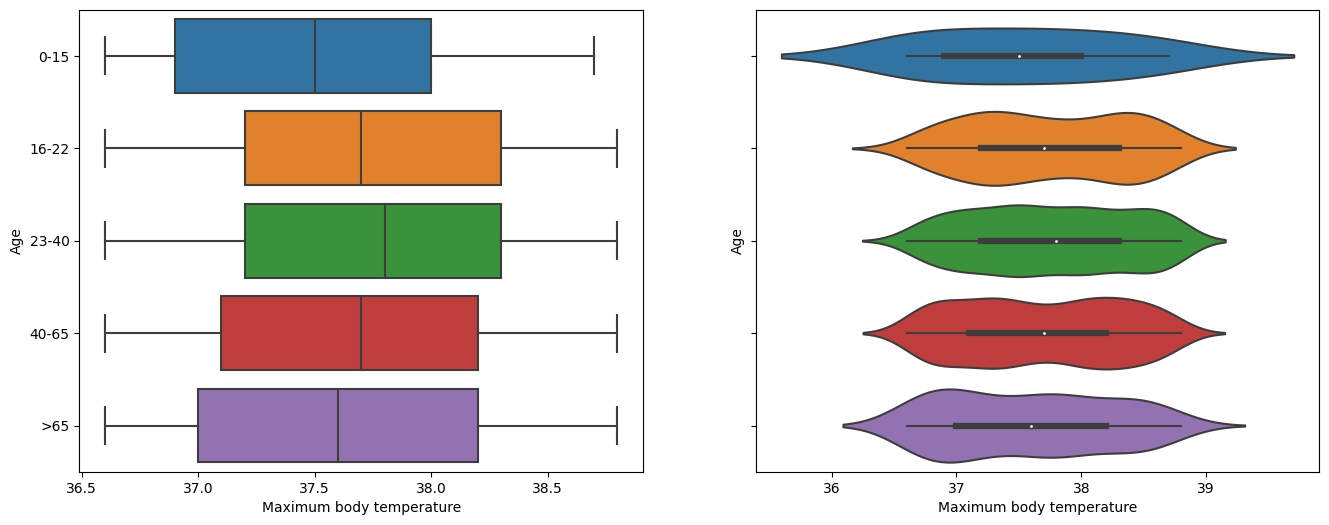

In [302]:
cols = ['Maximum body temperature', 'Maximum body temperature']
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(y = df["Age"], x=df["Maximum body temperature"], ax=axes[0])
sns.violinplot(y = df["Age"], x=df["Maximum body temperature"],ax=axes[1] )

## Conclusions


Como muestra la práctica, los datos obtenidos en experimentos de campo reales no son adecuados para el procesamiento estadístico directo. 
A diferencia de los enfoques clásicos bien conocidos para el análisis de datos estadísticos, Python contiene muchas bibliotecas poderosas que le permiten manipular datos de manera fácil y rápida. Por lo tanto, hemos realizado los métodos básicos para automatizar una biblioteca como Pandas para el análisis de datos estadísticos. También los métodos básicos para visualizar los datos obtenidos con la biblioteca SeaBorn, que también contiene medios efectivos de análisis visual de datos.

## Authors


[Yaroslav Vyklyuk, prof., PhD., DrSc](http://vyklyuk.bukuniver.edu.ua/en/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinhealthcarebasicstatisticalanalysis507-2022-01-01).
